In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import datetime
import time
import urllib
import os
from tqdm import tqdm
import math
import requests
from astropy.time import Time
from scipy.optimize import curve_fit
import plotly.express as px
from bs4 import BeautifulSoup
import requests, lxml, re, json
import pickle
from umap import UMAP
from astropy.io import fits
import plotly.express as px

In [1]:
from grb.light_curves import *
from grb.furie import *

In [2]:
lc = SPI_ACS_LightCurve('2021-06-19 23:59:25', 300)

In [8]:
lc = GBM_LightCurve('bn210619999','00001000100000')

KeyboardInterrupt: 

In [2]:
lc = GBM_LightCurve('bn210619999','00001000100000', data = pd.read_csv('test.csv')[['times','signal']].values)

In [2]:
lc = GBM_LightCurve.load('kek')

In [3]:
flc = FurieLightCurve(lc,(0.576-15,54.785+60))

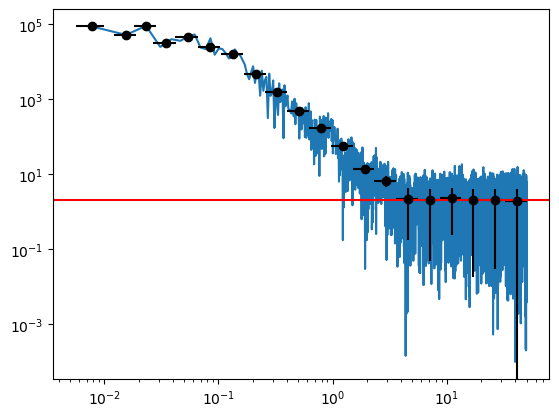

In [10]:
flc.plot(N_bins=None,kind='plot')
flc.plot(N_bins=20,kind='errorbar',color='black')
plt.axhline(2,color='r')

In [5]:
final = pd.read_excel('candidates_crossmatched_final (2).xlsx')
final['datetime_start'] = (final['datetime']-pd.to_timedelta(2*final['duration'], unit='s')).dt.strftime('%Y-%m-%dT%H:%M:%S')
final['datetime_finish'] = (final['datetime']+pd.to_timedelta(3*final['duration'], unit='s')).dt.strftime('%Y-%m-%dT%H:%M:%S')
final['dT'] = (final['duration_err']/10).astype(int)
df = pd.read_csv('candidates_detector_data.csv',parse_dates=['datetime']).set_index('datetime').merge(final.set_index('datetime'),left_index=True,right_index=True)[['acs_flux','duration','distance_x','iremtc3.da_flux','ibis_veto__flux','isgri_E20-_flux','jmx1_E3-20_flux','jmx2_E3-20_flux','picsit_evt_flux','picsit_spe_flux','spi_E20-50_flux','Bkg', 'Hurley','RHESSI', 'Konus', 'GOES', 'Candidate']]
df_cand = pd.read_csv('candidates_bins_data.csv',parse_dates=['datetime']).set_index('datetime')
df_cand = df_cand.apply(lambda x:(x-np.min(x))/np.sum(x-np.min(x)),axis=1)
df = df.merge(df_cand,left_index=True,right_index=True)
df = df[df!=np.inf].dropna()
df

acs_flux  duration     distance_x  \
datetime                                                          
2003-02-14 09:49:43.816   99709.228577       380  158453.991691   
2003-02-15 11:12:13.993   48849.252930       399  114211.591765   
2003-02-15 11:13:44.816   87139.530457       260  112863.210584   
2003-02-15 11:14:03.816   80037.297424       180  112873.337338   
2003-02-17 02:42:43.816  124275.544189       260  150300.495887   
...                                ...       ...            ...   
2021-10-22 00:44:38.816  786535.042480       500  119037.231057   
2021-10-23 13:02:39.816  355513.531250       380  144457.241113   
2021-10-23 13:04:14.816  341770.945312       340  144448.395876   
2021-11-05 04:33:03.816  428018.000000       320   78249.730721   
2021-11-07 05:46:19.816  432585.291016       379   87590.563821   

                         iremtc3.da_flux  ibis_veto__flux  isgri_E20-_flux  \
datetime                                                                     
2003-02-14 09:49:43.816    147642.781250         4.597248       241.587233   
2003-02-15 11:12:13.993         0.000000        -0.506576        -1.891384   
2003-02-15 11:13:44.816    -29143.187500        -1.163334       909.150373   
2003-02-15 11:14:03.816    -14568.156250        -1.051227      2480.009488   
2003-02-17 02:42:43.816    185770.187500        -7.991562       132.308917   
...                                  ...              ...              ...   
2021-10-22 00:44:38.816     13088.992188     28615.829285        -0.398237   
2021-10-23 13:02:39.816     71657.815430      5428.494629         0.000000   
2021-10-23 13:04:14.816     71657.815430      5410.608887         0.000000   
2021-11-05 04:33:03.816         0.000000      9699.613711         0.000000   
2021-11-07 05:46:19.816         0.000000      7761.910645      4288.458731   

                         jmx1_E3-20_flux  jmx2_E3-20_flux  picsit_evt_flux  \
datetime                                                                     
2003-02-14 09:49:43.816        52.299291        70.301765              0.0   
2003-02-15 11:12:13.993        -0.394558        -0.355817              0.0   
2003-02-15 11:13:44.816        83.790173       114.181686              0.0   
2003-02-15 11:14:03.816       232.289831       318.553010              0.0   
2003-02-17 02:42:43.816        95.925394        95.577247              0.0   
...                                  ...              ...              ...   
2021-10-22 00:44:38.816       214.645284       416.682898              0.0   
2021-10-23 13:02:39.816         0.000000         0.000000              0.0   
2021-10-23 13:04:14.816         0.000000         0.000000              0.0   
2021-11-05 04:33:03.816         0.000000         0.000000              0.0   
2021-11-07 05:46:19.816      5026.890637      5506.177365              0.0   

                         picsit_spe_flux  ...     0_bin     1_bin     2_bin  \
datetime                                  ...                                 
2003-02-14 09:49:43.816       441.681107  ...  0.016960  0.051848  0.092503   
2003-02-15 11:12:13.993        49.849897  ...  0.016107  0.050850  0.091839   
2003-02-15 11:13:44.816       164.760406  ...  0.018568  0.053106  0.085824   
2003-02-15 11:14:03.816       316.403992  ...  0.021596  0.051352  0.088486   
2003-02-17 02:42:43.816        26.920962  ...  0.018568  0.053106  0.085824   
...                                  ...  ...       ...       ...       ...   
2021-10-22 00:44:38.816       308.456360  ...  0.023482  0.056102  0.090128   
2021-10-23 13:02:39.816         0.000000  ...  0.016960  0.051848  0.092503   
2021-10-23 13:04:14.816         0.000000  ...  0.018445  0.052969  0.092430   
2021-11-05 04:33:03.816         0.000000  ...  0.022476  0.055888  0.091377   
2021-11-07 05:46:19.816      2892.523193  ...  0.016628  0.051636  0.092537   

                            3_bin     4_bin     5_bin     6_bin     7_bin  \
datetime               

In [6]:
df['GRB'] = df['Hurley']|df['Konus']
df['SOLAR'] = df['RHESSI']|df['GOES']

In [7]:
transformed = UMAP(n_neighbors=30).fit_transform(df)

In [8]:
df['umaped_1'] = transformed[:,0]
df['umaped_2'] = transformed[:,1]

In [9]:
fig = px.scatter(x=transformed[[True if ((row['GRB']==1) or (row['Bkg']==1)) else False for i,row in df.iterrows()],0],
                 y=transformed[[True if ((row['GRB']==1) or (row['Bkg']==1)) else False for i,row in df.iterrows()],1],
                 color = [0 if row['GRB']==1 else 2 if row['Bkg']==1 else 1 for i,row in df.iterrows() if ((row['GRB']==1) or (row['Bkg']==1))])
fig.show()

In [10]:
data = None
for idx,detector in enumerate(['Bkg','GRB','SOLAR']):
    tmp = df[df[detector]==1][['acs_flux', 'duration', 'distance_x', 'iremtc3.da_flux',
       'ibis_veto__flux', 'isgri_E20-_flux', 'jmx1_E3-20_flux',
       'jmx2_E3-20_flux', 'picsit_evt_flux', 'picsit_spe_flux',
       'spi_E20-50_flux','0_bin', '1_bin', '2_bin', '3_bin', '4_bin', '5_bin',
       '6_bin', '7_bin', '8_bin', '9_bin','umaped_1','umaped_2']]
    tmp['label'] = idx
    data = pd.concat((data,tmp))

In [5]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import fbeta_score,balanced_accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [12]:
X = data.drop(columns=['label'])
Y = data['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [13]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,Y_train,verbose=1)
print(fbeta_score(Y_test,lgbm.predict(X_test),beta=2,average='weighted'),
      balanced_accuracy_score(Y_test,lgbm.predict(X_test)),
      roc_auc_score(Y_test,lgbm.predict_proba(X_test),multi_class='ovr'))

c:\Users\georg\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



0.618883612377615 0.5538220854667997 0.7730194708536451


In [6]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay

label_binarizer = LabelBinarizer().fit(Y_train)
y_onehot_test = label_binarizer.transform(Y_test)
y_score = lgbm.predict_proba(X_test)
fig, ax = plt.subplots(figsize=(6, 6))

fig = plt.Figure()
for class_id,classs in enumerate(['Bkg','GRB','SOLAR']):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {classs}",
        ax = ax
    )
plt.plot([0, 1], [0, 1], "k--", label="ROC curve for random prediction (AUC = 0.5)")
plt.show()

NameError: name 'Y_train' is not defined

Уберём SOLAR т.к. точность ужасная

In [15]:
data_pruned = None
for idx,detector in enumerate(['Bkg','GRB']):
    tmp = df[df[detector]==1][['acs_flux', 'duration', 'distance_x', 'iremtc3.da_flux',
       'ibis_veto__flux', 'isgri_E20-_flux', 'jmx1_E3-20_flux',
       'jmx2_E3-20_flux', 'picsit_evt_flux', 'picsit_spe_flux',
       'spi_E20-50_flux','0_bin', '1_bin', '2_bin', '3_bin', '4_bin', '5_bin',
       '6_bin', '7_bin', '8_bin', '9_bin','umaped_1','umaped_2']]
    tmp['label'] = idx
    data_pruned = pd.concat((data_pruned,tmp))

In [16]:
X_pruned = data_pruned.drop(columns=['label'])
Y_pruned = data_pruned['label']
X_train_2,X_test_2,Y_train_2,Y_test_2 = train_test_split(X_pruned,Y_pruned)

lgbm_2 = LGBMClassifier()
lgbm_2.fit(X_train_2,Y_train_2,verbose=1)

print(fbeta_score(Y_test_2,lgbm_2.predict(X_test_2),beta=2,average='weighted'),
      balanced_accuracy_score(Y_test_2,lgbm_2.predict(X_test_2)),
      roc_auc_score(Y_test_2,lgbm_2.predict(X_test_2)))

0.8648410681178113 0.8649964607139246 0.8649964607139247


c:\Users\georg\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



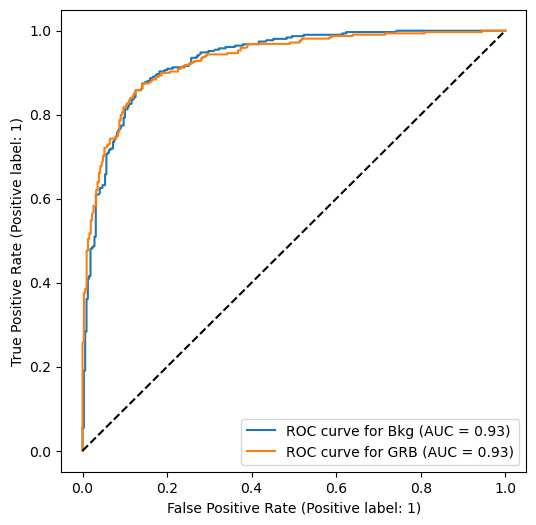

In [18]:
label_binarizer_2 = LabelBinarizer().fit(Y_train_2)
y_onehot_test_2 = label_binarizer.transform(Y_test_2)
y_score_2 = lgbm_2.predict_proba(X_test_2)
fig, ax = plt.subplots(figsize=(6, 6))

fig = plt.Figure()
for class_id,classs in enumerate(['Bkg','GRB']):
    RocCurveDisplay.from_predictions(
        y_onehot_test_2[:, class_id],
        y_score_2[:, class_id],
        name=f"ROC curve for {classs}",
        ax = ax
    )
plt.plot([0, 1], [0, 1], "k--", label="ROC curve for random prediction (AUC = 0.5)")
plt.show()

Рассмотрим отдельно кандидаты

In [22]:
df_candidates = df[df['Candidate']==1][lgbm_2.feature_name_]
df_candidates['proba_grb'] = lgbm_2.predict_proba(df_candidates)[:,1]

Text(0.5, 0, 'distance, km')

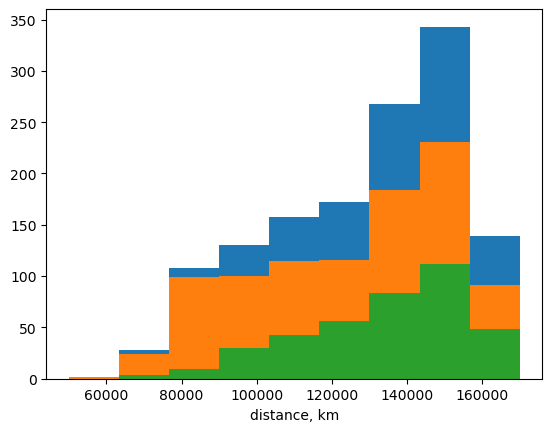

In [91]:
bins_all,a,b = plt.hist(df_candidates['distance_x'],bins=np.linspace(50000,170000,10))
bins_bkg,_,_ = plt.hist(df_candidates[df_candidates['proba_grb']<0.5]['distance_x'],bins=np.linspace(50000,170000,10))
bins_grb,_,_ = plt.hist(df_candidates[df_candidates['proba_grb']>0.5]['distance_x'],bins=np.linspace(50000,170000,10))
plt.xlabel('distance, km')

Text(0.5, 0, 'distance, km')

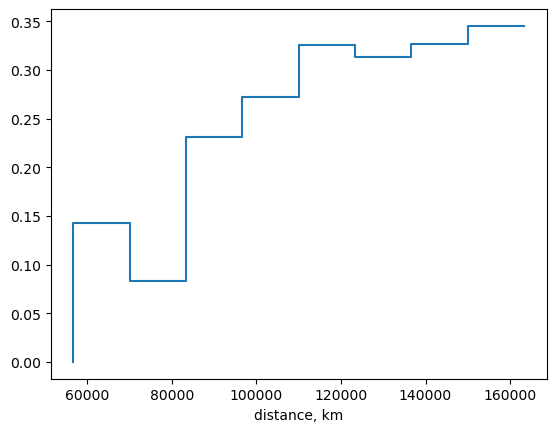

In [92]:
plt.step((a[1:]+a[:-1])/2,bins_grb/bins_all)
plt.xlabel('distance, km')

In [48]:
bins_grb/bins_all

array([0.        , 0.14285714, 0.08333333, 0.23076923, 0.2721519 ,
       0.3255814 , 0.31343284, 0.32653061, 0.34532374])

<AxesSubplot:xlabel='name'>

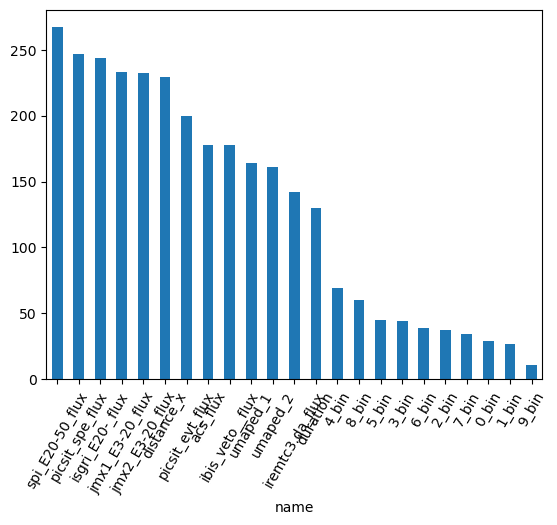

In [38]:
feature_imps = pd.DataFrame(list(zip(lgbm_2.feature_name_,lgbm_2.feature_importances_)),columns=['name','importance']).set_index('name').sort_values('importance',ascending=False)
feature_imps['importance'].plot(kind='bar',rot=60)

In [102]:
with open('model_bkg-grb_lgbm.pkl','wb') as f:
    pickle.dump(lgbm_2,f)

In [32]:
df_candidates.sort_values('proba_grb',ascending=False).head(5)

acs_flux  duration     distance_x  \
datetime                                                          
2012-02-09 01:34:42.816   69194.109863       159  159620.452046   
2014-02-07 10:12:41.816   51359.980469       200  161630.433264   
2011-10-15 07:56:04.816   30505.972412       160  162388.717689   
2015-06-02 20:10:36.816   45002.792480       160  145251.722444   
2013-07-14 05:20:40.816  231949.109375       380  102230.776853   

                         iremtc3.da_flux  ibis_veto__flux  isgri_E20-_flux  \
datetime                                                                     
2012-02-09 01:34:42.816         0.000000       132.182596       -12.959245   
2014-02-07 10:12:41.816         0.000000     13748.181152       763.182281   
2011-10-15 07:56:04.816    -20387.000000        -1.113487       -51.800309   
2015-06-02 20:10:36.816         0.000000       106.707053       119.192870   
2013-07-14 05:20:40.816    261897.507812      9430.816162       226.912200   

                         jmx1_E3-20_flux  jmx2_E3-20_flux  picsit_evt_flux  \
datetime                                                                     
2012-02-09 01:34:42.816         0.974687        -2.032345         2.848637   
2014-02-07 10:12:41.816       -32.131243        15.348358         3.631271   
2011-10-15 07:56:04.816         5.126428       -13.358410         1.517628   
2015-06-02 20:10:36.816        19.593444         9.242370         0.000000   
2013-07-14 05:20:40.816         4.947717        10.865303         8.097824   

                         picsit_spe_flux  ...     3_bin     4_bin     5_bin  \
datetime                                  ...                                 
2012-02-09 01:34:42.816      -174.721008  ...  0.120209  0.152005  0.170474   
2014-02-07 10:12:41.816       602.822510  ...  0.122481  0.154458  0.168951   
2011-10-15 07:56:04.816      -315.118164  ...  0.121157  0.151448  0.170465   
2015-06-02 20:10:36.816        99.825684  ...  0.121157  0.151448  0.170465   
2013-07-14 05:20:40.816       158.044312  ...  0.124724  0.156978  0.175520   

                            6_bin     7_bin     8_bin  9_bin   umaped_1  \
datetime                                                                  
2012-02-09 01:34:42.816  0.172328  0.139074  0.086258    0.0  12.215276   
2014-02-07 10:12:41.816  0.164542  0.140393  0.087556    0.0  12.726770   
2011-10-15 07:56:04.816  0.171316  0.138509  0.086653    0.0  13.187797   
2015-06-02 20:10:36.816  0.171316  0.138509  0.086653    0.0  12.997866   
2013-07-14 05:20:40.816  0.162030  0.131420  0.088017    0.0   5.556072   

                         umaped_2  proba_grb  
datetime                                      
2012-02-09 01:34:42.816  5.581679   0.999257  
2014-02-07 10:12:41.816  4.556560   0.997667  
2011-10-15 07:56:04.816  3.304161   0.997209  
2015-06-02 20:10:36.816  4.680995   0.995454  
2013-07-14 05:20:40.816  7.745983   0.994884  

[5 rows x 24 columns]

In [70]:
acs_data.get_ijd_from_utc(str(event_datetime)[:19])

'2012-02-09 01:34:42'

In [99]:
event_datetime = df_candidates.sort_values('proba_grb').reset_index().iloc[3]['datetime']
event_datetime

Timestamp('2017-01-07 14:41:48.816000')

In [100]:
get_pic(event_datetime)

c:\Users\georg\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning:

Unverified HTTPS request is being made to host '193.232.11.95'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings



In [71]:
def get_pic(event_datetime):
    row = final.set_index('datetime').loc[event_datetime]
    r = requests.get(f"https://193.232.11.95/lvc/r/Mozgunov/20220928/Candidates/{acs_data.get_ijd_from_utc(str(row['datetime_start'])[:19])}_{acs_data.get_ijd_from_utc(str(row['datetime_finish'])[:19])}__{row['dT']}s/8det.png",verify=False,stream=True)
    with open(f"pics_bkg/{event_datetime}_pic.png", 'wb') as f:
        f.write(r.raw.read())

In [61]:
(lgbm.predict(df[df['Candidate']==1][lgbm.feature_name_])==0).sum()

708

In [56]:
predictions_candidates[predictions_candidates[:,2]>0.9]

array([[0.00364042, 0.08900256, 0.90735702],
       [0.01871828, 0.05195089, 0.92933082],
       [0.04085465, 0.02347452, 0.93567083],
       [0.00833634, 0.06373425, 0.92792941],
       [0.04929869, 0.04314302, 0.90755829],
       [0.03870083, 0.00659941, 0.95469976],
       [0.00618166, 0.04483737, 0.94898097],
       [0.01600175, 0.04967058, 0.93432767],
       [0.02158211, 0.02713736, 0.95128053],
       [0.01417922, 0.049656  , 0.93616478],
       [0.0163482 , 0.01830734, 0.96534447],
       [0.00195011, 0.02858114, 0.96946875],
       [0.01326571, 0.07728263, 0.90945166],
       [0.0428291 , 0.04168958, 0.91548132],
       [0.00646022, 0.05222494, 0.94131484],
       [0.00439527, 0.09426844, 0.9013363 ],
       [0.01467672, 0.03101711, 0.95430617],
       [0.02015284, 0.0114504 , 0.96839676],
       [0.00736121, 0.05023329, 0.9424055 ],
       [0.00940961, 0.06049385, 0.93009653],
       [0.00407899, 0.05496317, 0.94095785],
       [0.03135875, 0.02647403, 0.94216722],
       [0.

In [14]:
config.ROOT_DIR

'c:\\Python projects\\GRB_data_processing'

In [106]:
def process_file(filename,left=None,right=None):
    try:
        x,x_err,y,y_err = np.hsplit(np.loadtxt(f"pics_bkg/{filename}"),4)
        x = x.reshape(-1,)
        x_err = x_err.reshape(-1,)
        y = y.reshape(-1,)
        y_err = y_err.reshape(-1,)

        x_ev,y_ev,mod_3=p=find_event(x,y)
        if left is None:
            left = np.min(x_ev)
            right = np.max(x_ev)
        else:
            x_ev = x[(x>left)&(x<right)]
            y_ev = y[(x>left)&(x<right)]
        chi=Chi2(x[(x<=left)|(x>=right)],y[(x<=left)|(x>=right)],y_err[(x<=left)|(x>=right)],mod_3)
        
        return y_ev,x_ev,mod_3,chi,left,right
    except TypeError:
        return [],[],[],0,left,right
    except ValueError:
        return [],[],[],0,left,right

In [110]:
import warnings
import os.path

warnings.filterwarnings("ignore")
# result = {}
try:
    for idx,folder in enumerate(['Candidates_badorbit','Candidates','Crossmatched_badorbit']): #'Crossmatched',
        r = requests.get(f"https://193.232.11.95/lvc/r/Mozgunov/20220928/{folder}/",verify=False)
        soup = BeautifulSoup(r.text)
        for link in tqdm(soup.find_all('a')[5:-2]):
            r = requests.get(f"https://193.232.11.95/lvc/r/Mozgunov/20220928/{folder}/{link['href']}",verify=False)
            soup = BeautifulSoup(r.text)
            start_time = list(acs_data.get_utc_from_ijd(link['href'].split('_')[0])[:19])
            start_time[10]= 'T'
            start_time = ''.join(start_time)
            t0 = final[final['datetime_start']==start_time]['datetime'].values[0]
            if t0 not in result:
                acs_lc = get_acs_lc(pd.to_datetime(str(t0)).strftime("%Y-%m-%d %H:%M:%S"),int(final[final['datetime_start']==start_time]['duration'].values[0]),'ijd')
                left = float(acs_data.get_ijd_from_utc(str(final[final['datetime']==time]['datetime'].values[0])))
                right = float(acs_data.get_ijd_from_utc(str(final[final['datetime']==time]['datetime'].values[0]))) + final[final['datetime_start']==start_time]['duration'].values[0]/(24*60*60)
                result[t0] = {}
                logging.info(f'{t0=},{left=},{right=}')
                try:
                    for detector in sorted([x['href'] for x in soup.find_all('a')[5:] if x['href'] not in ['info.dat','obts.dat','obts.dat.obt2ijd','scws/','8det.png']]):
                        r = requests.get(f"https://193.232.11.95/lvc/r/Mozgunov/20220928/{folder}/{link['href']}/{detector}",verify=False,stream=True)
                        with open(f"pics_bkg/{detector}", 'wb') as f:
                            f.write(r.raw.read())
                        if detector == 'distances.dat':
                            y,x,_,_,_,_ = process_file(detector,left=left,right=right)
                            if y != []:
                                result[t0]['distance'] = np.mean(y[(x>left)&(x<right)])
                            else:
                                result[t0]['distance'] = None
                        else:
                            y,x,par,chi2,left,right = process_file(detector,left=left,right=right)
                            if detector[:3] == 'acs':
                                name = 'acs'
                            else:
                                name = detector[:10]

                            if y == []:
                                result[t0][name+'_flux'] = 0
                                result[t0][name+'_chi2'] = None
                            else:
                                result[t0][name+'_flux'] = np.sum(y-np.polyval(par,x))
                                result[t0][name+'_chi2'] = chi2

                            if detector[:3] == 'acs':
                                duration = ((right - left)/2)*24*60*60
                                lc_acs=ACS_Light_Curve(acs_data.get_utc_from_ijd((left+right)/2)[:19],duration*2)
                                lc_acs.rebin(duration/5)
                                _,_,p = find_event(lc_acs.times,lc_acs.signal)
                                signal = (lc_acs.signal - np.polyval(p,lc_acs.times))[5:15]

                                logging.info(f'{t0},{len(signal)},{signal}')
                                signal = signal + np.min(signal)
                                result[t0]['bins'] = signal/np.sum(signal)          
                except Exception:
                    logging.info(t0,'failed')
except ChunkedEncodingError:
    pass

100%|██████████| 3298/3298 [2:07:22<00:00,  2.32s/it]  


In [117]:
result

{numpy.datetime64('2003-02-14T04:04:43.816000000'): {'acs_flux': 0.0,
  'acs_chi2': 2.60986548678861,
  'bins': array([0.02428992, 0.05600265, 0.09177723, 0.12417497, 0.15305282,
         0.15496005, 0.15583803, 0.14697852, 0.09113936, 0.00178645]),
  'distance': None,
  'ibis_veto__flux': 0.0,
  'ibis_veto__chi2': 0.0003217389216183344,
  'iremtc3.da_flux': 0.0,
  'iremtc3.da_chi2': 178916319500.29578,
  'isgri_E20-_flux': 0.0,
  'isgri_E20-_chi2': 1.904064997451835,
  'jmx1_E3-20_flux': 0.0,
  'jmx1_E3-20_chi2': inf,
  'jmx2_E3-20_flux': 0.0,
  'jmx2_E3-20_chi2': inf,
  'picsit_evt_flux': 0,
  'picsit_evt_chi2': None,
  'picsit_spe_flux': 0.0,
  'picsit_spe_chi2': 13.705251077885753,
  'spi_E20-50_flux': 0,
  'spi_E20-50_chi2': None},
 numpy.datetime64('2003-02-14T09:49:43.816000000'): {'acs_flux': 0.0,
  'acs_chi2': 2.960017567809595,
  'bins': array([0.03231056, 0.06074965, 0.09388881, 0.12015382, 0.14644479,
         0.16155908, 0.15056338, 0.12561203, 0.0902319 , 0.01848598]),
  

In [121]:
df_bins = pd.DataFrame([[key]+list(dict_.get('bins')) for key,dict_ in result.items()],
                columns = ['datetime']+[f"{i}_bin" for i in range(10)]).set_index('datetime')

In [133]:
!pip install numpy==1.23.5

In [126]:
df_bins.to_csv('candidates_bins_data.csv')

In [98]:
pd.to_datetime(str(t0)).strftime("%Y-%m-%d %H:%M:%S"),int(final[final['datetime_start']==start_time]['duration'].values[0])

('2006-09-03 07:28:54', 1400)

In [96]:
from requests.exceptions import ChunkedEncodingError

In [46]:
for i,row in final.iterrows():
    # try:
    start = row['datetime']
    finish = row['datetime'] + datetime.timedelta(seconds=row['duration']+row['duration_err'])

    central_time = str(row['datetime'] + datetime.timedelta(seconds=row['duration']/2))[:19]
    duration = ((row['duration']+row['duration_err'])/2)*60*60*24

    lc_acs=ACS_Light_Curve(central_time,duration*3)
    lc_acs.rebin(duration/5)
    _,_,p = find_event(lc_acs.times,lc_acs.signal)
    signal = (lc_acs.signal - np.polyval(p,lc_acs.times))[5:15]

    logging.info(f'{time},{len(signal)},{signal}')
    result[time]['bins'] = signal/np.sum(signal)
    # except KeyboardInterrupt:
    #     KeyboardInterrupt()
    # except BaseException as e:
    #     logging.info(time,'failed',e)

KeyboardInterrupt: 

In [57]:
def create_integral_curve(y):
    y_int = []
    y_temp = np.array(y)
    for i in range(len(y)):
        y_int.append(np.sum(y_temp[0:i]))
    return y_int / np.max(y_int)

def get_intersect(x,y,value):
    intersect_list = list(abs(np.asarray(y) - 0.5))
    center_pos = intersect_list.index(np.min(intersect_list))
    if value > 0.5:
        for i in range(center_pos,len(x)):
            if (y[i] - value) > 0:
                return x[i]
    else:
        for i in range(center_pos,0,-1):
            if (y[i] - value) < 0:
                return x[i]

def is_between(a,x,b):
    return a <= x <= b

def align_lc(x1,y1,x2,x2_err):
    counts = []
    x1 = np.asarray(x1)
    y1 = np.asarray(y1)
    for i in range(len(x2)):
        indx = tuple([np.logical_and(x1 >= x2[i] - x2_err[i],
                                    x1 <= x2[i] + x2_err[i]
                                    )])
        counts.append(np.sum(y1[indx]))
    return np.asarray(counts)

def reverse_align(x1,x1_err,x2,x2_err,y2):
    counts = []
    mult = 60/0.05
    for i in range(len(x1)):
        temp = np.argmin(abs(x2 - x1[i]))
        counts.append(y2[temp]/mult)
    return np.asarray(counts)

def Chi2(x,y,y_err,p):
    """
    Returns Chi square functional
    x,y,y_err = same size arrays
    p = np.polyfit parameters vector
    """
    chi=0
    for i in range(0,len(x)):
        chi=chi+((y[i]-np.polyval(p,x[i]))/y_err[i])**2
    return chi/(len(x)-len(p))

def find_event(x,y):
    """
    Recieves light curve
    x,y,y_err = same size arrays
    p = np.polyfit parameters vector
    Returns bins with event
    """

    x1=np.array(x)
    y1=np.array(y)
    p=np.polyfit(x,y,3)
    y_temp=[]
    x_temp=[]
    for i in range(len(x1)):
        if is_between(-2000,x1[i],2000):
            x_temp.append(x1[i])
            y_temp.append(y1[i])

    sign_array=(np.asarray(y_temp)-np.polyval(p,np.asarray(x_temp)))/np.sqrt(np.asarray(y_temp)*1.35)
    x1=list(x1)
    y1=list(y1)
    sign_array=list(sign_array)
    peak=sign_array.index(max(sign_array))
    peak=x1.index(x_temp[peak])
    left=peak
    right=peak
    sign_array=(np.asarray(y1)-np.polyval(p,np.asarray(x1)))/np.sqrt(np.asarray(y1)*1.35)
    while sign_array[left-1]>1:
        left-=1
        if left==0:
            break
    try:
        while sign_array[right+1]>1:
            right+=1
    except:
        pass

    event=[e for e in range(left,right+1)]

    x1_fixed=[]
    y1_fixed=[]
    for i in range(0,len(x1)):
        if i not in event:
            x1_fixed.append(x1[i])
            y1_fixed.append(y1[i])
    p1=np.polyfit(x1_fixed,y1_fixed,3)

    x1=np.array(x)
    y1=np.array(y)
    y_temp=[]
    x_temp=[]
    for i in range(len(x1)):
        if is_between(-2000,x1[i],2000):
            x_temp.append(x1[i])
            y_temp.append(y1[i])

    sign_array=(np.asarray(y_temp)-np.polyval(p1,np.asarray(x_temp)))/np.sqrt(np.asarray(y_temp)*1.35)
    x1=list(x1)
    y1=list(y1)
    sign_array=list(sign_array)
    peak=sign_array.index(max(sign_array))
    peak=x1.index(x_temp[peak])
    left=peak
    right=peak
    sign_array=(np.asarray(y1)-np.polyval(p1,np.asarray(x1)))/np.sqrt(np.asarray(y1)*1.35)
    while sign_array[left-1]>1:
        left-=1
        if left==0:
            break
    try:
        while sign_array[right+1]>1:
            right+=1
    except:
        pass

    event=[e for e in range(left,right+1)]

    x1_event=[]
    y1_event=[]
    for i in range(0,len(x1)):
        if i in event:
            x1_event.append(x1[i])
            y1_event.append(y1[i])
    return x1_event,y1_event,p1



In [ ]:
len(lc_acs.original_times)

160

In [ ]:
lc_acs=ACS_Light_Curve(central_time,duration)
lc_acs.rebin(duration/5)

16
16
16
16
16
16
16
16
16
16


In [ ]:
lc_acs.signal

[60741.0,
 60869.0,
 60283.0,
 60967.0,
 60466.0,
 60520.0,
 61139.0,
 60980.0,
 60849.0,
 60963.0]

In [ ]:
curve = acs_data()

In [ ]:
result[np.datetime64('2003-02-14T04:04:43.816000000')]['light_curve']['time']

[1140.1576123805,
 1140.1576355287,
 1140.1576586768,
 1140.157681825,
 1140.1577049731]

In [ ]:
candidate_catalog = []
with open('E:\ACS\preliminary_candidates_1000sec.txt','r') as f:
    for line in f:
        line = line.split(',')
        t=Time(line[0],scale='utc')
        t.format = 'jd'
        t = t.value-2451544.5
        line[0] = t
        candidate_catalog.append([line[0],float(line[1])])

In [ ]:
catalog=pd.read_csv('E:/ACS/Konus-WIND catalog_fixed(1).csv')
temp_list=list(catalog['UT'])
ll2=[]
for line in temp_list:
    ll2.append(datetime.datetime.strptime(line, '%Y-%m-%d %H:%M:%S'))
catalog['UT']=ll2

In [ ]:
# N=0
# final_catalog = []
for grb in candidate_catalog[N:]:
    print(f'processing {grb[0]}')
    try:
        grb_time = get_utc_from_ijd(grb[0])[:19]
        distance = round(grb[1],2)
        lc_acs=ACS_Light_Curve(grb_time,6000)
        lc_acs.rebin(200)
        lc_acs.clear(10)
        lc=IREM_Light_curve(grb_time,6000)

        fig = plt.figure(figsize=(10,10),dpi=300)
        gs = fig.add_gridspec(17, 1)

        ax=fig.add_subplot(gs[0:14, :])
        a,b,c,d=lc_acs.get()
        ax.errorbar(a,c,xerr=b,yerr=d, fmt='o',color='black')
        ax.set_ylabel(f'ACS Counts \ {lc_acs.binning} sec')

        ax.tick_params(axis='x', labelcolor='white')

        x_ev,y_ev,mod_3=find_event(a,c)
        ax.plot(a,np.polyval(mod_3,a))
        ax.fill_between(x_ev, y_ev, np.polyval(mod_3,x_ev), step="mid", color="red", alpha=0.3)
        ax.set_xlim(-6200,6200)
        for x in x_ev:
            wrong=a.index(x)
            a.pop(wrong)
            b.pop(wrong)
            c.pop(wrong)
            d.pop(wrong)

        chi=Chi2(a,c,d,mod_3)

        grb=datetime.datetime.strptime(grb_time, '%Y-%m-%d %H:%M:%S')
        peak=grb+datetime.timedelta(0,(max(x_ev)+min(x_ev)/2))

        res = min(list(catalog['UT']), key=lambda sub: abs(sub - peak))
        index = catalog.index
        condition = catalog["UT"] == res
        grb_param  = index[condition]
        grb_param_list = catalog.iloc[grb_param].to_numpy()[0]
        left=grb+datetime.timedelta(0,min(x_ev)-100)
        right=grb+datetime.timedelta(0,max(x_ev)+100)
        print(peak,datetime.datetime.strptime(str(grb_param_list[0]), '%Y-%m-%d %H:%M:%S')+datetime.timedelta(0,grb_param_list[1]/2), is_between(left,datetime.datetime.strptime(str(grb_param_list[0]), '%Y-%m-%d %H:%M:%S')+datetime.timedelta(0,grb_param_list[1]/2),right))
        res1=datetime.datetime.strptime(str(grb_param_list[0]), '%Y-%m-%d %H:%M:%S')+datetime.timedelta(0,grb_param_list[1]/2)
        delta=res1.timestamp()-grb.timestamp()
        if is_between(left,datetime.datetime.strptime(str(grb_param_list[0]), '%Y-%m-%d %H:%M:%S')+datetime.timedelta(0,grb_param_list[1]/2),right):
            index = catalog.index
            condition = catalog["UT"] == res
            grb_param  = index[condition]
            grb_param_list = catalog.iloc[grb_param].to_numpy()[0]
            if not isinstance(grb_param_list[2],float):
                plt.title(f'{grb_time} Confirmed {grb_param_list[2]}')
            elif not isinstance(grb_param_list[3],float):
                if isinstance(grb_param_list[8],float):
                    plt.title(f'{grb_time} Type = {grb_param_list[3]}')
                else:
                    plt.title(f'{grb_time} Type = {grb_param_list[3]} Comment = {grb_param_list[8]}')
            elif not isinstance(grb_param_list[8],float):
                plt.title(f'{grb_time} Comment = {grb_param_list[8]}')
            else:
                plt.title(f'{grb_time} Type = Astr. Candidate')
        elif is_between(grb+datetime.timedelta(0,-6000),datetime.datetime.strptime(str(grb_param_list[0]), '%Y-%m-%d %H:%M:%S')+datetime.timedelta(0,grb_param_list[1]/2),grb+datetime.timedelta(0,6000)):
            ax.axvline(delta)
            if not isinstance(grb_param_list[2],float):
                plt.title(f'{grb_time} Delta {delta} Confirmed {grb_param_list[2]}')
            elif not isinstance(grb_param_list[3],float):
                if isinstance(grb_param_list[8],float):
                    plt.title(f'{grb_time} Delta {delta} Type = {grb_param_list[3]}')
                else:
                    plt.title(f'{grb_time} Delta {delta} Type = {grb_param_list[3]} Comment = {grb_param_list[8]}')
            elif not isinstance(grb_param_list[8],float):
                plt.title(f'{grb_time} Delta {delta} Comment = {grb_param_list[8]}')
            else:
                plt.title(f'{grb_time} Delta {delta} Type = Astr. Candidate')
        else:
            plt.title(f'{grb_time} Type = Astr. Candidate')

        #         plt.title(f'{grb_time} T_0-T_pericenter = {distance} Type = {grb_param_list[0,3]}')

        ax.plot([], [], ' ', label=f"Duration = {int(max(x_ev)-min(x_ev))+lc_acs.binning} +- {lc_acs.binning} sec")
        ax.plot([], [], ' ', label=f"Area = {int(np.sum(y_ev-np.polyval(mod_3,x_ev)))} +- {int(np.sqrt(np.sum(np.polyval(mod_3,x_ev))*1.35))}")
        ax.plot([], [], ' ', label=f"Sigma = {round(np.sum(y_ev-np.polyval(mod_3,x_ev))/np.sqrt(np.sum(np.polyval(mod_3,x_ev))*1.35),1)}")
        ax.plot([], [], ' ', label=f"Chi2_bkg_qubic = {round(chi,1)}")

        ax.legend(loc='upper right')


        # ax = fig.subplots(4,1)
        a,b,c,d=np.hsplit(lc.TC3,4)
        ax0=fig.add_subplot(gs[14:17, :])
        ax0.errorbar(a.reshape(-1,),c.reshape(-1,),xerr=b.reshape(-1,),yerr=d.reshape(-1,), fmt='o',color='black')
        ax0.set_ylabel('TC3 counts / 60 sec')
        ax0.axhline(np.median(c))
        ax0.set_xlabel('Time since trigger , sec')
        ax0.set_xlim(-6200,6200)

        try:
            if is_between(left,grb_param_list[0]+datetime.timedelta(0,grb_param_list[1]/2),right):
                plt.savefig(f'pics_and_list/matched/Astrophysical_and__IREM_crosmatched_# {N}')
            elif chi>4.5:
                plt.savefig(f'pics_and_list/bad_bkg/Astrophysical_and__IREM_crosmatched_# {N}')
            else:
                plt.savefig(f'pics_and_list/Astrophysical_and__IREM_crosmatched_# {N}')
        except :
            if is_between(left,grb_param_list[0]+datetime.timedelta(0,grb_param_list[1]/2),right):
                plt.savefig(f'pics_and_list/matched/Astrophysical_and__IREM_crosmatched_# {N}')
            elif chi>4.5:
                plt.savefig(f'pics_and_list/bad_bkg/Astrophysical_and__IREM_crosmatched_# {N}')
            else:
                plt.savefig(f'pics_and_list/Astrophysical_and__IREM_crosmatched_# {N}')
        plt.close(fig)
        if is_between(left,grb_param_list[0]+datetime.timedelta(0,grb_param_list[1]/2),right):
            final_catalog.append([grb+datetime.timedelta(0,min(x_ev)-100),distance,int(max(x_ev)-min(x_ev))+200,lc_acs.binning,int(sum(y_ev-np.polyval(mod_3,x_ev))),int(np.sqrt(sum(np.polyval(mod_3,x_ev))*1.35)),round(sum(y_ev-np.polyval(mod_3,x_ev))/np.sqrt(sum(np.polyval(mod_3,x_ev))*1.35),1),round(chi,1),'matched'])
        elif chi>4.5:
            final_catalog.append([grb+datetime.timedelta(0,min(x_ev)-100),distance,int(max(x_ev)-min(x_ev))+200,lc_acs.binning,int(sum(y_ev-np.polyval(mod_3,x_ev))),int(np.sqrt(sum(np.polyval(mod_3,x_ev))*1.35)),round(sum(y_ev-np.polyval(mod_3,x_ev))/np.sqrt(sum(np.polyval(mod_3,x_ev))*1.35),1),round(chi,1),'bkg'])
        else:
            final_catalog.append([grb+datetime.timedelta(0,min(x_ev)-100),distance,int(max(x_ev)-min(x_ev))+200,lc_acs.binning,int(sum(y_ev-np.polyval(mod_3,x_ev))),int(np.sqrt(sum(np.polyval(mod_3,x_ev))*1.35)),round(sum(y_ev-np.polyval(mod_3,x_ev))/np.sqrt(sum(np.polyval(mod_3,x_ev))*1.35),1),round(chi,1),'candidate'])
        N += 1
    except BaseException:
        print(f'{grb_time} failed')
        N += 1
    with open('final_catalog.pkl','wb') as f:
        pickle.dump(final_catalog,f)
    time.sleep(1)

processing 4846.099525462836
2013-04-08 01:34:41.001508 2013-04-07 19:12:47.500000 False
processing 4846.909710648004
2013-04-08 21:51:20.999734 2013-04-08 21:51:47 True
processing 4854.7685185186565
2013-04-16 18:43:02.033762 2013-04-16 18:28:50.500000 False
processing 4855.810173611157
2013-04-17 19:41:20.999286 2013-04-17 20:50:15 False
processing 4856.0185185186565
2013-04-17 23:53:02.018150 2013-04-17 20:50:15 False
processing 4857.557858796325
2013-04-19 12:54:41.032930 2013-04-19 13:31:16 False
processing 4858.796284722164
2013-04-20 19:53:01.014680 2013-04-20 22:10:42.500000 False
processing 4866.469895833172
2013-04-28 11:31:21.023032 2013-04-28 14:55:01 False
processing 4869.537025462836
2013-05-01 13:09:40.988674 2013-05-01 14:12:30 False
processing 4870.069432870485
2013-05-02 01:56:21.034253 2013-05-02 05:01:38 False
processing 4871.574062500149
2013-05-03 14:03:01.001158 2013-05-03 15:00:45.500000 False
processing 4871.6435185186565
2013-05-03 15:39:42.007253 2013-05-03 1

In [ ]:
with open('final_catalog.pkl','wb') as f:
    pickle.dump(final_catalog,f)

In [ ]:
with open('final_catalog.pkl','rb') as f:
    final_catalog = pickle.load(f)

In [ ]:
true_1000sec = pd.DataFrame(final_catalog,columns = ['datetime','distance','duration','duration_err','integral_flux','integral_flux_err','significance','bkg_chi2','type'])

In [ ]:
false = pd.read_excel('crossmatched_final(4)(1).xlsx').drop(columns='Unnamed: 0')
false = false[false['duration_err']!=200]

In [ ]:
true_time = []

'2003-02-14 09:50:48'

In [ ]:
for time in tqdm(false['datetime'][1384:]):
    t=Time(time,scale='utc')
    t.format = 'jd'
    t = t.value-2451544.5
    true_time.append(get_utc_from_ijd(str(t)))

100%|██████████| 2495/2495 [1:07:56<00:00,  1.63s/it]


In [ ]:
false.shape

(3879, 9)

In [ ]:
[x for x in true_time if x in list(set(true_time))]

3879

In [ ]:
list(dict.fromkeys(true_time))

['2003-02-14 09:49:43.816',
 '2003-02-15 11:13:44.816',
 '2003-02-15 15:41:44.816',
 '2003-02-15 15:41:43.816',
 '2003-02-16 10:33:43.816',
 '2003-02-17 02:42:43.816',
 '2003-02-17 04:21:44.816',
 '2003-02-17 14:23:43.816',
 '2003-02-18 11:37:43.816',
 '2003-02-19 12:10:44.816',
 '2003-02-19 16:29:43.816',
 '2003-02-20 16:08:43.816',
 '2003-02-20 20:36:43.816',
 '2003-02-21 00:46:43.816',
 '2003-02-23 04:07:43.816',
 '2003-02-23 09:41:44.816',
 '2003-02-23 16:47:44.816',
 '2003-02-23 22:47:44.816',
 '2003-02-25 14:59:44.816',
 '2003-02-26 03:43:44.816',
 '2003-02-26 08:59:43.816',
 '2003-02-27 14:45:44.816',
 '2003-02-28 21:31:44.816',
 '2003-03-02 10:26:44.816',
 '2003-03-04 13:24:44.816',
 '2003-03-04 17:27:44.816',
 '2003-03-05 00:37:44.816',
 '2003-03-05 02:44:44.816',
 '2003-03-05 10:45:44.816',
 '2003-03-07 00:12:44.816',
 '2003-03-07 05:04:44.816',
 '2003-03-07 14:26:44.816',
 '2003-03-08 04:20:44.816',
 '2003-03-08 07:17:44.816',
 '2003-03-08 09:21:43.816',
 '2003-03-10 07:48:4

In [ ]:
false['datetime_corrected'] = list(dict.fromkeys(true_time))

In [ ]:

false.to_excel('corrected_without_1000.xlsx')

In [ ]:
true_1000sec.to_excel('true_1000sec.xlsx')



In [ ]:
get_utc_from_ijd(1140.16003685185),get_utc_from_ijd(1140.18665722222)


('2003-02-14 03:49:23.000', '2003-02-14 04:27:43.000')

In [ ]:
get_ijd_from_utc('2003-02-14 03:49:23'),get_ijd_from_utc('2003-02-14 04:27:43')

(1140.16003685185, 1140.18665722222)